# Import library

In [67]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, scale 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.preprocessing import OneHotEncoder,StandardScaler

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Load The train dataset

In [68]:
df_train=pd.read_csv('/content/gdrive/MyDrive/train.csv')

In [69]:
df_train.head() #displays first 5 rows

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [70]:
df_train.tail() #displays last 5 rows

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


#  EDA 

In [71]:
df_train.shape #rows and columns 

(7352, 563)

In [72]:
df_train.isnull().sum() #returns the number of missing values in the data set.

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [73]:
df_train.describe() # view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [74]:
#checking for duplicates
#ma3ndnash duplicates

print('Number of duplicate entries in the dataset {}'.format(sum(df_train.duplicated())))

Number of duplicate entries in the dataset 0


# Class Distribution

In [75]:
df_train['Activity'].unique() #betgeeb asamy el objects el fel dataset b esm el row da without duplicates

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

# Now Visualize the class Distribution

[]

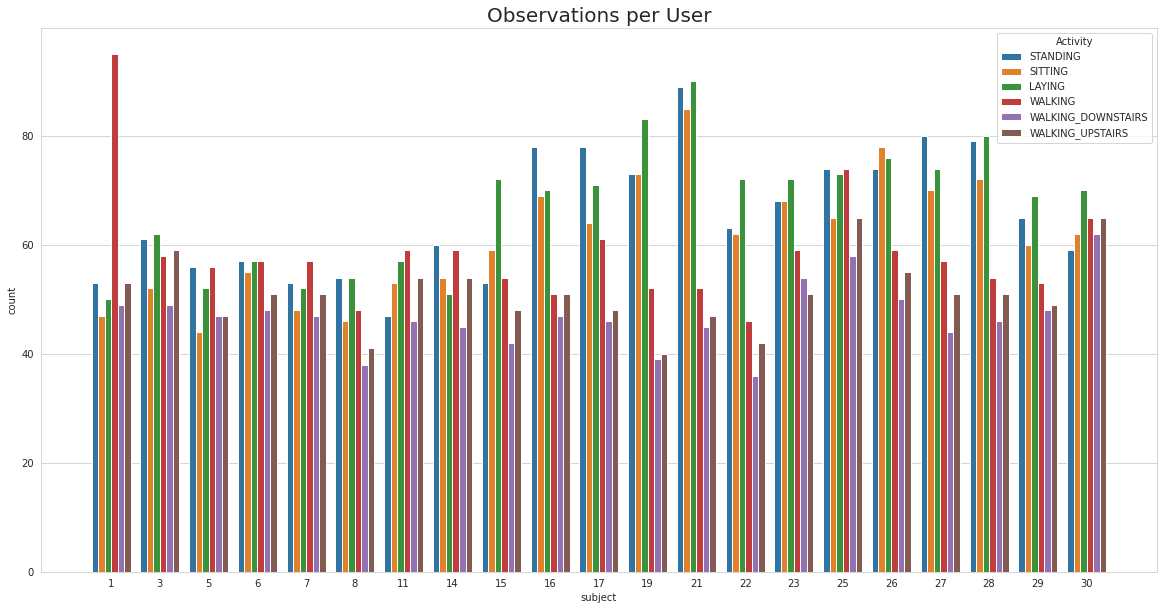

In [76]:
# Plotting data with respect to subject
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.title('Observations per User', fontsize=20)
sns.countplot(x='subject', hue='Activity', data=df_train)
plt.plot()

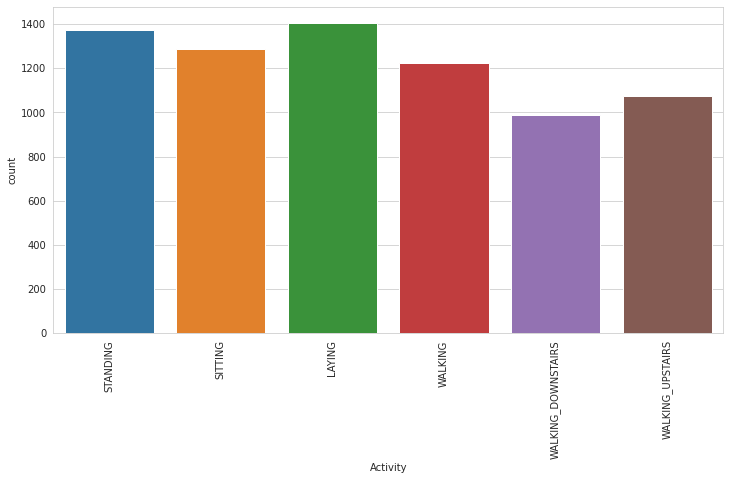

In [77]:
plt.figure(figsize=(12,6))
axis=sns.countplot(x="Activity",data=df_train)
plt.xticks(x=df_train['Activity'],rotation='vertical')
plt.show()

# Now Subject Part

In [78]:
df_train['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [79]:
X=pd.DataFrame(df_train.drop(['Activity','subject'],axis=1)) #btakhod kol el rows ma3ada el activity subject
y=df_train.Activity.values.astype(object) 
#3amalna assign lel activties as an object f y

In [80]:
X.shape , y.shape

((7352, 561), (7352,))

In [81]:
X.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [82]:
y[5]

'STANDING'

In [84]:
#Total Number of Continous and Categorical features in the training set
num_cols = X._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 561


# Transforming Non numerical Labels into numerical labels

In [128]:
from sklearn import preprocessing

In [129]:
encoder=preprocessing.LabelEncoder() #bet7awel l numerical values badal strings 

In [130]:
encoder.fit(y)
y=encoder.transform(y)
y.shape

(7352,)

In [131]:
y[5]

2

In [132]:
encoder.classes_

array([0, 1, 2, 3, 4, 5])

In [133]:
encoder.classes_[5]

5

# Feature Scaling

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=StandardScaler() 
#removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be 

In [93]:
X=scaler.fit_transform(X) #scale the training data and also learn the scaling parameters of that data.

In [94]:
X[6]

array([ 7.06803102e-02, -4.76710598e-02, -1.55590510e-02, -8.72474295e-01,
       -9.07757392e-01, -9.03754203e-01, -8.64275181e-01, -9.03851692e-01,
       -9.10339492e-01, -8.67537814e-01, -9.19981570e-01, -8.85046696e-01,
        9.00763029e-01,  8.35192782e-01,  8.03287734e-01, -9.31094055e-01,
       -6.93173920e-01, -7.74075988e-01, -6.93119192e-01, -8.41045000e-01,
       -8.84476644e-01, -9.10107626e-01, -1.13918098e+00, -8.61804418e-01,
       -1.00341946e+00,  1.55654217e+00, -1.36305466e+00,  1.08465809e+00,
       -2.64947656e-01,  3.51743371e-01, -4.77984819e-01, -1.04913339e-01,
       -7.76570603e-02,  7.75990031e-01, -6.83706720e-01,  1.19646917e+00,
       -1.75787141e+00,  8.06280631e-02,  1.75396032e-01,  1.31266913e+00,
        5.87944948e-01, -4.17203705e-01, -2.23034808e-03, -4.46314996e-01,
       -3.81493257e-01, -5.13903339e-01, -4.43381738e-01, -3.78584813e-01,
       -5.03100724e-01,  5.67025939e-01, -4.50196825e-01, -4.00607961e-02,
        6.07951308e-01, -

# Split X and y 
# Training and Validation sets

In [134]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42) #yaany 3amalna 80% training w 20% testing

In [97]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5881, 561), (1471, 561), (5881,), (1471,))

# Training The Model

In [135]:

# import SVC classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Firstly SVM

# Run SVM with default hyperparameters

In [99]:
svc=SVC(kernel="linear") #garabna poly degree 2 w poly degree 3 w linear w linear a7san % #linear 98 poly 2 w 1 97 w kasr w rbf el heya el default 9789 a7san mel poly 

In [100]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [101]:
y_pred=svc.predict(X_test)

# Default SVC Score

In [102]:
# Predict the labels

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Confusion Matrix

[[280   0   0   0   0   0]
 [  0 253   9   0   0   0]
 [  0  12 264   0   0   0]
 [  0   0   0 245   0   2]
 [  0   0   0   1 205   0]
 [  0   0   0   0   1 199]]


Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.95      0.97      0.96       262
           2       0.97      0.96      0.96       276
           3       1.00      0.99      0.99       247
           4       1.00      1.00      1.00       206
           5       0.99      0.99      0.99       200

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471

Model accuracy score with default hyperparameters: 0.9830


#  rbf and C=100.0

In [103]:
svc2=SVC(kernel='rbf',C=100.0)


# fit classifier to training set
svc2.fit(X_train,y_train)

# make predictions on test set
y_pred2 = svc2.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score with rbf kernel and C=100.0 : 0.9912


# Now Random Forest Classifier

In [136]:
rand_clf=RandomForestClassifier(random_state=5)

In [137]:
rand_clf.fit(X_train,y_train)


RandomForestClassifier(random_state=5)

In [138]:
y_pre=rand_clf.predict(X_test)

In [139]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pre)

array([[280,   0,   0,   0,   0,   0],
       [  0, 251,  11,   0,   0,   0],
       [  0,  10, 266,   0,   0,   0],
       [  0,   0,   0, 245,   0,   2],
       [  0,   0,   0,   0, 202,   4],
       [  0,   0,   0,   0,   1, 199]])

In [140]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pre)

0.9809653297076818

In [141]:
print("Classification report - \n", classification_report(y_test,y_pre))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.96      0.96      0.96       262
           2       0.96      0.96      0.96       276
           3       1.00      0.99      1.00       247
           4       1.00      0.98      0.99       206
           5       0.97      0.99      0.98       200

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471




**Decision Tree**


In [142]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [143]:
# Predicting the values of test data
y_preddd = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_preddd))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.92      0.93      0.93       262
           2       0.93      0.93      0.93       276
           3       0.94      0.96      0.95       247
           4       0.98      0.92      0.95       206
           5       0.92      0.95      0.93       200

    accuracy                           0.95      1471
   macro avg       0.95      0.95      0.95      1471
weighted avg       0.95      0.95      0.95      1471



In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preddd)

array([[280,   0,   0,   0,   0,   0],
       [  0, 243,  19,   0,   0,   0],
       [  0,  20, 256,   0,   0,   0],
       [  0,   0,   0, 237,   0,  10],
       [  0,   0,   0,   9, 190,   7],
       [  0,   0,   0,   7,   3, 190]])

# **KNN Classifier**


In [113]:
knn = KNeighborsClassifier(7)

In [114]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [115]:
Y_predict = knn.predict(X_test)

In [116]:
y_test = y_test.flatten()
Y_predict = Y_predict.flatten()

In [117]:
DATA_knn = pd.DataFrame({'Y_test': y_test , 'Y_pred': Y_predict}) 
DATA_knn

,Y_test,Y_pred
0,4,4
1,4,4
2,3,3
3,1,1
4,4,4
...,...,...
1466,0,0
1467,2,2
1468,1,1
1469,1,2


In [118]:
accuracy_score(Y_predict,y_test)

0.9612508497620667

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_predict)

array([[280,   0,   0,   0,   0,   0],
       [  0, 224,  38,   0,   0,   0],
       [  0,  12, 264,   0,   0,   0],
       [  0,   0,   0, 247,   0,   0],
       [  0,   0,   0,   4, 201,   1],
       [  0,   0,   0,   1,   1, 198]])

In [120]:
print(classification_report(Y_predict,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.85      0.95      0.90       236
           2       0.96      0.87      0.91       302
           3       1.00      0.98      0.99       252
           4       0.98      1.00      0.99       202
           5       0.99      0.99      0.99       199

    accuracy                           0.96      1471
   macro avg       0.96      0.97      0.96      1471
weighted avg       0.96      0.96      0.96      1471



# **Naive Bayse**

In [121]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [122]:
y_predd  =  classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predd)
ac = accuracy_score(y_test,y_predd)
print("Accuracy:" , ac)


Accuracy: 0.7314751869476547


In [123]:

print(classification_report(y_test, y_predd))
print(confusion_matrix(y_test, y_predd))
Accuracy = round((accuracy_score(y_test, y_predd) * 100))
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy : " , Accuracy , "%")

              precision    recall  f1-score   support

           0       0.96      0.41      0.58       280
           1       0.51      0.74      0.60       262
           2       0.80      0.89      0.84       276
           3       0.93      0.74      0.82       247
           4       0.83      0.76      0.79       206
           5       0.65      0.91      0.76       200

    accuracy                           0.73      1471
   macro avg       0.78      0.74      0.73      1471
weighted avg       0.78      0.73      0.73      1471

[[116 161   0   0   0   3]
 [  3 193  62   0   0   4]
 [  2  24 246   0   0   4]
 [  0   0   0 183  18  46]
 [  0   0   0   9 156  41]
 [  0   0   0   5  13 182]]
Accuracy :  73 %


# **MLP**

In [124]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),  #represents the number of neurons in the ith hidden layer.
                    random_state=5,            # It defines the random number for weights and bias initialization. 
                    verbose=True,              #It used to print progress messages to standard output.
                    learning_rate_init=0.01)   #used to controls the step-size in updating the weights

# Fit data onto the model
clf.fit(X_train,y_train)


Iteration 1, loss = 1.24091409
Iteration 2, loss = 0.49012122
Iteration 3, loss = 0.21765835
Iteration 4, loss = 0.12833590
Iteration 5, loss = 0.11229852
Iteration 6, loss = 0.08306127
Iteration 7, loss = 0.06754478
Iteration 8, loss = 0.07929942
Iteration 9, loss = 0.05490730
Iteration 10, loss = 0.04878666
Iteration 11, loss = 0.04255621
Iteration 12, loss = 0.04222120
Iteration 13, loss = 0.05626051
Iteration 14, loss = 0.04398430
Iteration 15, loss = 0.05290677
Iteration 16, loss = 0.03733126
Iteration 17, loss = 0.03042802
Iteration 18, loss = 0.02807690
Iteration 19, loss = 0.03085388
Iteration 20, loss = 0.02423154
Iteration 21, loss = 0.02953584
Iteration 22, loss = 0.03377361
Iteration 23, loss = 0.03939099
Iteration 24, loss = 0.02498410
Iteration 25, loss = 0.02566865
Iteration 26, loss = 0.02327314
Iteration 27, loss = 0.01994446
Iteration 28, loss = 0.02655995
Iteration 29, loss = 0.02277497
Iteration 30, loss = 0.01775545
Iteration 31, loss = 0.01935737
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [125]:
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)


0.9809653297076818

In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred)

array([[280,   0,   0,   0,   0,   0],
       [  0, 250,  12,   0,   0,   0],
       [  0,  10, 266,   0,   0,   0],
       [  0,   0,   0, 244,   0,   3],
       [  0,   0,   0,   0, 206,   0],
       [  0,   0,   0,   2,   1, 197]])

In [127]:

print("Classification report - \n", classification_report(y_test,ypred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.96      0.95      0.96       262
           2       0.96      0.96      0.96       276
           3       0.99      0.99      0.99       247
           4       1.00      1.00      1.00       206
           5       0.98      0.98      0.98       200

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471

